# SMM Project - Tweet processing for Mentions

## Extracting UserID and Mention from Tweet Text
* First, pair userID and TweetText
* Try regular expression to pair userName with mention
* Try for loop to iterate through list and pair userName, mention

## Load data as pickle file

In [1]:
import pandas as pd 
import numpy as np
import pickle as pkl

df = pkl.load(open("SMM-cleanedTweets-16964.pkl", "rb"))

In [2]:
df.shape

(16964, 17)

In [3]:
df.columns

Index(['tweetId', 'txt', 'createdAt', 'userName', 'userID', 'lat', 'long',
       'geoPlace', 'profileLat', 'profileLong', 'profilePlace', 'repliedTo',
       'tweetType', 'mentions', 'hashtags', 'originalText',
       'originalUserName'],
      dtype='object')

### Remove Missing values for 'mentions'

In [4]:
df = df.dropna(subset=['mentions'])
df.shape

(3176, 17)

In [5]:
df.head()

,tweetId,txt,createdAt,userName,userID,lat,long,geoPlace,profileLat,profileLong,profilePlace,repliedTo,tweetType,mentions,hashtags,originalText,originalUserName
3,814975482097766400,@lauren_johanns update: my dads texting me whi...,2016-12-30 23:24:31,lauren johanns,880214958,NaN,NaN,"Ohio, USA",-83.00018,40.25034,"Ohio, United States",8.802150e+08,tweet,880214958,NaN,@lauren_johanns update: my dads texting me whi...,lauren johanns
4,814968426347122688,@Yahiam_ @lil_oxycodone do this,2016-12-30 22:56:28,Mikey P:copyright:,2524636207,NaN,NaN,"Clovis, CA",NaN,NaN,NaN,4.048356e+09,tweet,4048355817,NaN,@Yahiam_ @lil_oxycodone do this,Mikey P©
5,814966970248560640,"@DebraRn725 @TheTylt same here,we have both. I...",2016-12-30 22:50:41,Lucella-Thetis,28776853,NaN,NaN,"Fitchburg, MA",-71.05977,42.35843,"Boston, Massachusetts, United States",4.874417e+09,tweet,"4874417278,3387373071",NaN,"@DebraRn725 @TheTylt same here,we have both. I...",Lucella-Thetis
15,814933545294630916,"@heroichollywood That was the weakest ""It's mo...",2016-12-30 20:37:52,Top Dogs. LII Champions,381817827,NaN,NaN,"Delaware, USA",NaN,NaN,NaN,2.701407e+09,tweet,2701407349,NaN,"@heroichollywood That was the weakest ""It's mo...",Top Dogs. LII Champions
16,814933138644332545,I was soooo gone cus of codeine and @__chronol...,2016-12-30 20:36:15,SNOW the concierge :Jamaica:,91012599,NaN,NaN,"New Haven, CT",NaN,NaN,NaN,NaN,tweet,963181992,NaN,I was soooo gone cus of codeine and @__chronol...,SNOW the concierge 🇯🇲


In [ ]:
#df.to_csv('SMM-cleantweet-mentions.csv')

## Note: Single Tweets with more than one mention
* Make a list of tuples with usernames and tweet texts 
* And then do a list comprehension over that, e.g.,
* Or use a for loop

In [6]:
myTweets = list(zip(df.userName, df.txt))
myTweets[:5]

[('lauren johanns',
  '@lauren_johanns update: my dads texting me while hyped up on vicodin lmaooo'),
 ('Mikey P:copyright:', '@Yahiam_ @lil_oxycodone do this'),
 ('Lucella-Thetis',
  '@DebraRn725 @TheTylt same here,we have both. I think suboxone more effective in detoxing than methadone both addictive but suboxone no buzz'),
 ('Top Dogs. LII Champions',
  '@heroichollywood That was the weakest "It\'s morphine time" Iv ever heard.'),
 ('SNOW the concierge :Jamaica:',
  'I was soooo gone cus of codeine and @__chronological wanted me to be his damn pong partner')]

In [7]:
len(myTweets)

3176

In [8]:
import re
class TweetMatcher:
  def __init__(self):
    self.pat = re.compile(r'@([a-zA-Z0-9_]+)')
  def findMentions(self, text):
    return self.pat.findall(text)

https://stackoverflow.com/questions/740590/regexp-how-to-extract-usernames-out-of-tweets-twitter-com

In [9]:
TM = TweetMatcher()

myMentions = []
for userName,tweet in myTweets:
    for mention in TM.findMentions(tweet):
        myMentions.append( (userName, mention) )

In [10]:
len(myMentions)

4594

# Create Network from Edge List
* Create undirected graph for network analysis
* Create adjacency matrix from list of tuples [(userName, Mention)...]

In [11]:
edges = myMentions 
edges[:10]

[('lauren johanns', 'lauren_johanns'),
 ('Mikey P:copyright:', 'Yahiam_'),
 ('Mikey P:copyright:', 'lil_oxycodone'),
 ('Lucella-Thetis', 'DebraRn725'),
 ('Lucella-Thetis', 'TheTylt'),
 ('Top Dogs. LII Champions', 'heroichollywood'),
 ('SNOW the concierge :Jamaica:', '__chronological'),
 ('\x7f\x7fDan McGraw', 'DanMcGraw1'),
 ('\x7f\x7fDan McGraw', 'AmerMedicalAssn'),
 ('\x7f\x7fDan McGraw', 'PacificStand')]

In [12]:
import networkx as nx

G = nx.DiGraph()
G.add_edges_from(edges)

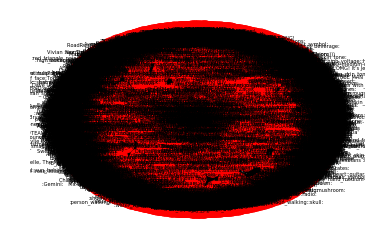

In [13]:
%matplotlib inline
import matplotlib.pyplot as plt

pos = nx.spring_layout(G, iterations=100)
nx.draw_networkx_nodes(G, pos, node_size = 300)
nx.draw_networkx_edges(G, pos)
nx.draw_networkx_labels(G, pos, font_size=5)
plt.axis("off")
#plt.show()

plt.savefig('smm-edges1.png')

In [14]:
import networkx as nx
nx.write_gml(G, "smm-cleantweets-4594.gml")

In [15]:
print(nx.info(G))

Name: 
Type: DiGraph
Number of nodes: 6091
Number of edges: 4105
Average in degree:   0.6739
Average out degree:   0.6739


In [16]:
myMentions

[('lauren johanns', 'lauren_johanns'),
 ('Mikey P:copyright:', 'Yahiam_'),
 ('Mikey P:copyright:', 'lil_oxycodone'),
 ('Lucella-Thetis', 'DebraRn725'),
 ('Lucella-Thetis', 'TheTylt'),
 ('Top Dogs. LII Champions', 'heroichollywood'),
 ('SNOW the concierge :Jamaica:', '__chronological'),
 ('\x7f\x7fDan McGraw', 'DanMcGraw1'),
 ('\x7f\x7fDan McGraw', 'AmerMedicalAssn'),
 ('\x7f\x7fDan McGraw', 'PacificStand'),
 ('angie menz', 'schantzpants'),
 ('\x7f\x7fDan McGraw', 'DanMcGraw1'),
 ('\x7f\x7fDan McGraw', 'AmerMedicalAssn'),
 ('Terri Harvey', 'JohnFugelsang'),
 ('Amanda Linehan', 'honest'),
 ('Opioid Task Force', 'nytimes'),
 ('Opioid Task Force', 'CDCgov'),
 ('tee cee', 'TomEmberger'),
 ('COWBOYS(13-4):cloud_with_lightning:', 'rollbluntss'),
 ('David C Martinez', 'bungisngis106'),
 ('David C Martinez', 'ArkiPb'),
 ('David C Martinez', 'leahnavarro'),
 ('David C Martinez', 'dawende'),
 ('David C Martinez', 'Jimparedes'),
 ('David C Martinez', 'MyRizalPH'),
 ('David C Martinez', 'PhelimKine

# Third Network: Classed by Misuse

## Read Final, filtered subset of Tweets for misuse, mentions

In [17]:
df = pd.read_csv('SMM-misuseTweets-mentions.csv')

df.columns

Index(['userName', 'mention'], dtype='object')

In [18]:
df.shape

(71, 2)

In [19]:
edges = list(zip(df.userName, df.mention))
edges[:10]

[('Georg Lukacs', 'redstatist'),
 ('CvThroat', 'HollyWoodStroke'),
 ('Brandon', 'holmesadam'),
 ('Bernie', 'DeptVetAffairs'),
 ('Bernie', 'FoxNews'),
 ('Jack Dolin', 'jessep1nkman97'),
 ('Shizi', 'kingramos39'),
 ('Shizi', 'Chase_Logic16'),
 ('joeneaves', 'DannyGradio'),
 ('realdopecelebrity', 'drivemylexusss')]

In [20]:
import networkx as nx

G = nx.DiGraph()
G.add_edges_from(edges)

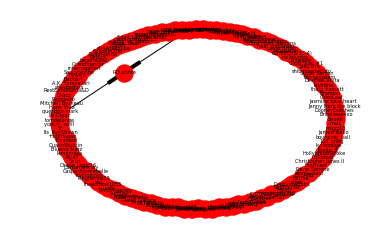

In [21]:
%matplotlib inline
import matplotlib.pyplot as plt

pos = nx.spring_layout(G, iterations=100)
nx.draw_networkx_nodes(G, pos, node_size = 300)
nx.draw_networkx_edges(G, pos)
nx.draw_networkx_labels(G, pos, font_size=5)
plt.axis("off")
#plt.show()

plt.savefig('smm-edges1.png')

In [22]:
import networkx as nx
nx.write_gml(G, "smm-misuseTweets-71.gml")

In [23]:
print(nx.info(G))

Name: 
Type: DiGraph
Number of nodes: 131
Number of edges: 71
Average in degree:   0.5420
Average out degree:   0.5420


# Notes for future reference

## Filter Tweets by topic

In [ ]:
#tweets['programming'] = tweets['text'].apply(lambda tweet: word_in_text('programming', tweet))
#tweets['tutorial'] = tweets['text'].apply(lambda tweet: word_in_text('tutorial', tweet))

### Add an additional column called relevant 
* Takes value == True if the tweet has either "programming" or "tutorial" keyword, 
* otherwise it takes value == False.

In [ ]:
#tweets['relevant'] = tweets['text'].apply(lambda tweet: word_in_text('programming', tweet) or word_in_text('tutorial', tweet))

### Print the counts of relevant tweet by executing the commands below.
* Returns, frequency for programming column, tutorial column, and relevant column.

In [ ]:
#print tweets['programming'].value_counts()[True]
#print tweets['tutorial'].value_counts()[True]
#print tweets['relevant'].value_counts()[True]

In [ ]:
#TM = TweetMatcher()
#MyTextDocuments = 

# You could also do this in a list comprehension
# mentions = [TM.findMentions(tweet) for tweet in MyTextDocuments]

# Or in a for loop
# mentions = []
# for tweet in MyTextDocuments:
#    mentions.append(TM.findMentions(tweet))
# Whatever you prefer